In this exploration, we wield Python and its potent libraries, including pandas, numpy, matplotlib, and seaborn, to navigate the “Hawaii Airbnb Open Data” dataset. Our mission: to understand the dynamics of Hawaii’s Airbnb market and extract key insights.

Through this journey, we unravel regional trends, guest preferences, and booking patterns, crafting a nuanced narrative of Hawaii’s Airbnb ecosystem. This project serves as a testament to Python’s data analysis prowess and a deep dive into Hawaii’s vibrant Airbnb landscape. Let’s explore together!

### Importing Libraries
In this code block we are importing all the necessary libraries for this analysis:

In [1]:
import folium as fl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import time

### Reading and Viewing CSV Data
In the first step of our analysis, we loaded our Airbnb listings dataset using the pandas function read_csv. This function reads the CSV file and converts it into a pandas DataFrame. After loading the data, we used the head function to display the first five rows of the DataFrame. This provides us with a quick overview of our data, showing us the column names and some example values from each column.

In [2]:
df = pd.read_csv("/Users/diogosilva/Documents/GitHub/datasets/U.S. Airbnb Open Data/AB_US_2020.csv")
df.head()

/var/folders/6x/sp_vy0g12kv_vw9114lrmss40000gn/T/ipykernel_30358/1902848564.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/diogosilva/Documents/GitHub/datasets/U.S. Airbnb Open Data/AB_US_2020.csv")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pets OK,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


### Inspecting the Shape of the Data
The shape attribute of a pandas DataFrame returns a tuple representing the dimensions of the DataFrame. Here is the code:

In [3]:
df.shape

(226030, 17)

The tuple returned (226030, 17). This means the DataFrame has 226,030 rows and 17 columns.

### Extract Column Names
The expression list(data.columns) converts the column names of a pandas DataFrame into a list.

In [4]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'city']

Leveraging the list() function on df.columns elegantly transforms the column names from a pandas Index object into a standard Python list. This transformation empowers us with greater flexibility to access and manipulate these column names.

This snippet of code proves instrumental when we wish to scrutinize or manipulate the column names of our DataFrame. It is particularly handy when we need to cherry-pick specific columns for analysis or visualization, offering us an efficient and straightforward way to engage with our dataset.

### Rent Statistics
In the code block below, we are conducting a statistical analysis of the ‘price’ column from our dataframe. The describe() function is used to generate a comprehensive set of descriptive statistics, which include measures such as the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum. The output from describe() is stored in the price_stats variable for future reference. Finally, we print the price_stats variable to display these calculated statistics, providing an informative summary of the distribution of prices in our dataset.



In [5]:
# Clean the price column and convert it to a float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Get basic statistics for the price
price_stats = df['price'].describe()

price_stats

count    226030.000000
mean        219.716529
std         570.353609
min           0.000000
25%          75.000000
50%         121.000000
75%         201.000000
max       24999.000000
Name: price, dtype: float64

The average price of a listing is approximately $219, with a standard deviation of around $570. This large standard deviation suggests a wide distribution of prices, which is confirmed by the maximum price of $24,999 and the minimum price of $0.

However, the 50% quartile (median) price is $121, and 75% of the listings have a price lower than $201. These figures suggest that there are a few listings with extremely high prices, which are skewing the mean.

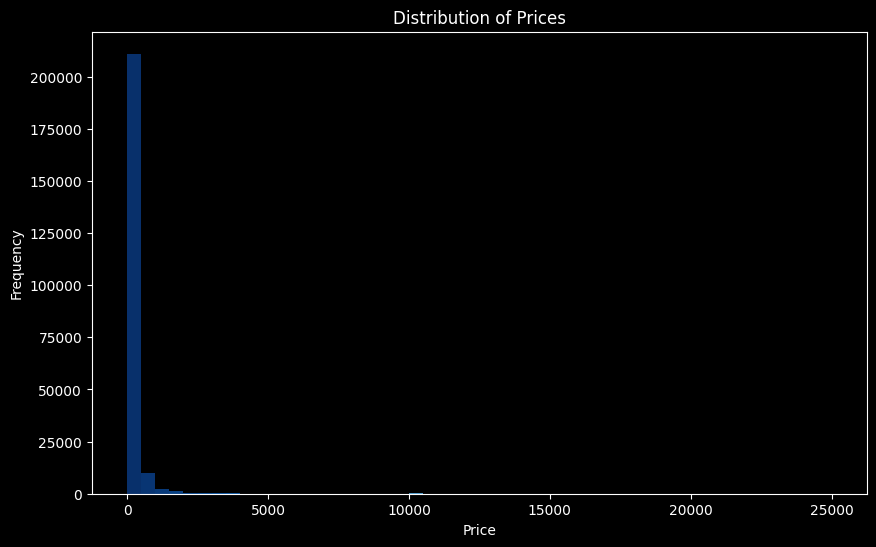

In [6]:
# Set the style to dark
plt.style.use("dark_background")

# Create a histogram for the distribution of prices
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['price'], bins=50, color='darkblue')

# Define a color palette
cmap = sns.color_palette("Blues_r", as_cmap=True)

# Scale values to interval [0,1]
col = (bins[:-1] + bins[1:]) / 2
col -= min(col)
col /= max(col)

# Apply the color palette to the bars
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

plt.title('Distribution of Prices', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.show()

In this code block we are creating our visualization for the rent price distribution and applying a dark background theme as well as a gradient which we will be using for all the visuals of this project. The histogram above displays the distribution of prices, but it’s hard to discern anything from it due to the extreme values or outliers.

To deal with this issue, let’s plot another histogram, this time only including listings with a price less than $1000, which should cover a substantial majority of the listings. This will give us a better sense of the distribution for most listings.

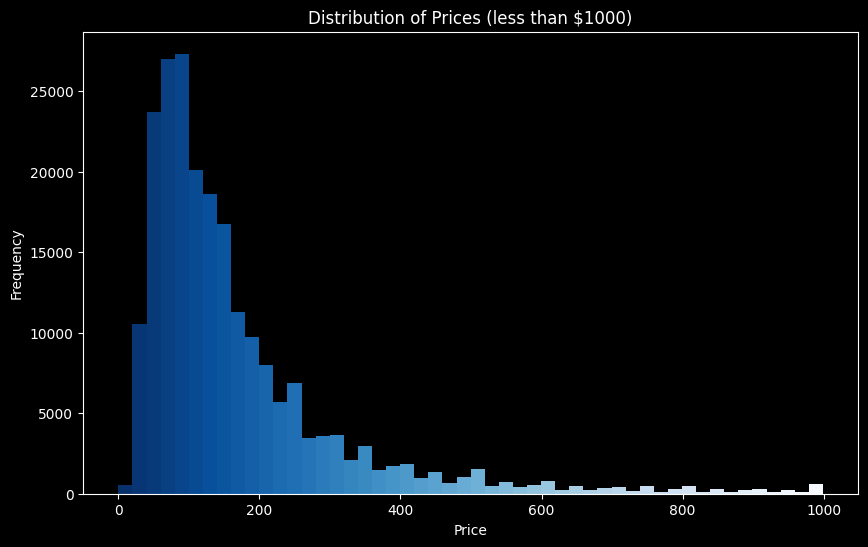

In [10]:
# Set the style to dark
plt.style.use("dark_background")

plt.figure(figsize=(10, 6))

filtered_df = df[df['price'] < 1000]

# Create a histogram for the distribution of filtered prices
n, bins, patches = plt.hist(filtered_df['price'], bins=50)

# Scale values to interval [0,1]
col = (bins[:-1] + bins[1:]) / 2
col -= min(col)
col /= max(col)

# Apply the color palette to bars
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

plt.title('Distribution of Prices (less than $1000)', color='white')
plt.xlabel('Price', color='white')
plt.ylabel('Frequency', color='white')
plt.show()